<a href="https://colab.research.google.com/github/ataanuuu/GRID_INTELLIGENCE/blob/main/Assignment1_230237_gridintelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
from google.colab import files


uploaded = files.upload()


Saving data1.csv to data1.csv


Load dataset

In [22]:
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']))
display(df.head())  # Display first 5 rows
display(df.tail())  # Display last 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


check datatypes

In [ ]:
print(df.dtypes)


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


drop irrelevant columns

In [ ]:
columns_to_drop = [
    "Engine Fuel Type", "Market Category", "Vehicle Style",
    "Popularity", "Number of Doors", "Vehicle Size"
]
df.drop(columns=columns_to_drop, inplace=True)
display(df.head())


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


rename columns

In [ ]:
df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
}, inplace=True)
display(df.head())


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


drop duplicate rows

In [ ]:
print("Original Shape:", df.shape)
print("Number of Duplicates:", df.duplicated().sum())

df.drop_duplicates(inplace=True)
print("New Shape:", df.shape)


Original Shape: (11914, 10)
Number of Duplicates: 989
New Shape: (10925, 10)


statistical summary

In [ ]:
statistics = df.describe().T  # Transpose for better readability
statistics["sum"] = df.sum()  # Add sum
display(statistics)


,count,mean,std,min,25%,50%,75%,max,sum
Year,10925.0,2010.917895,7.016102,1990.0,2007.0,2015.0,2016.0,2017.0,21969278
HP,10856.0,254.399503,109.771351,55.0,173.0,240.0,303.0,1001.0,2761761.0
Cylinders,10895.0,5.668196,1.799464,0.0,4.0,6.0,6.0,16.0,61755.0
MPG-H,10925.0,26.654737,9.031109,12.0,22.0,25.0,30.0,354.0,291203
MPG-C,10925.0,19.770801,9.259532,7.0,16.0,18.0,22.0,137.0,215996
Price,10925.0,42496.595698,62053.533610,2000.0,21995.0,30920.0,43300.0,2065902.0,464275308


handle missing values

In [ ]:
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("Missing Values After Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
Missing Values After Cleaning:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


data visualisation

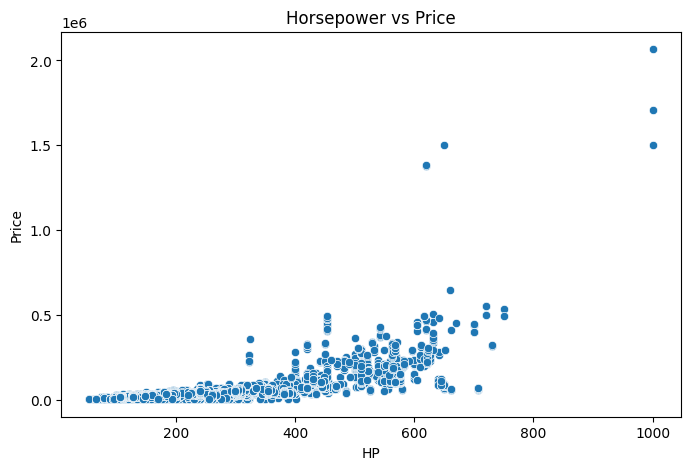

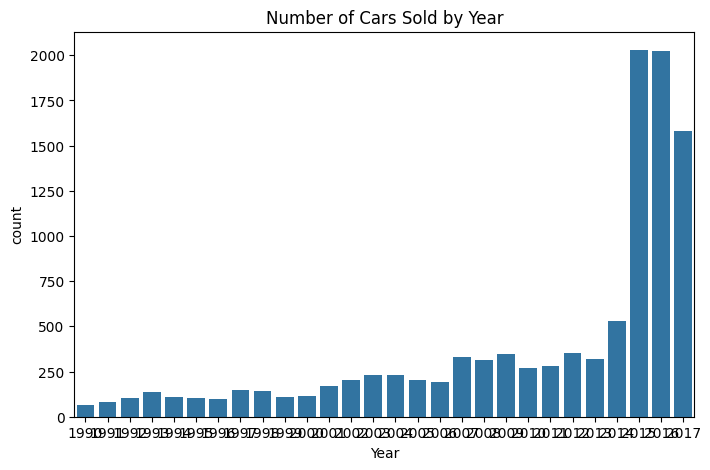

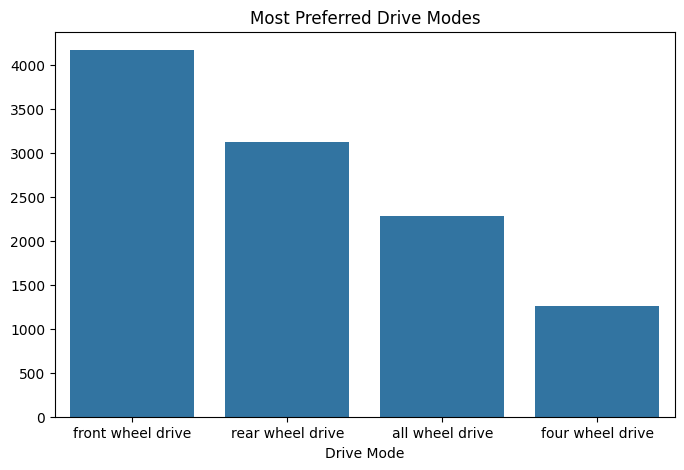

In [ ]:
# a) Horsepower vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="HP", y="Price", data=df)
plt.title("Horsepower vs Price")
plt.show()

# b) Sales by Year
plt.figure(figsize=(8, 5))
sns.countplot(x="Year", data=df)
plt.title("Number of Cars Sold by Year")
plt.show()

# c) Preferred Drive Mode
drive_mode_counts = df["Drive Mode"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=drive_mode_counts.index, y=drive_mode_counts.values)
plt.title("Most Preferred Drive Modes")
plt.show()


correlation matrix and heatmap

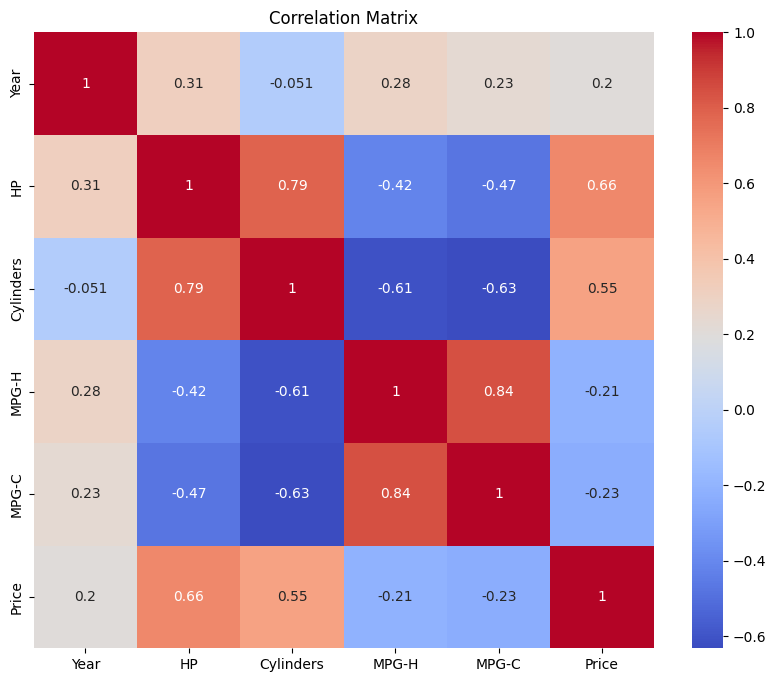

In [ ]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
